In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from plots_orbitas_schrodinger_poisson import scatter3d_animation
import plots_jordi as pts
#import cartopy.crs as ccrs
#from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
t = np.ones((11))
%matplotlib inline

Milky Way all

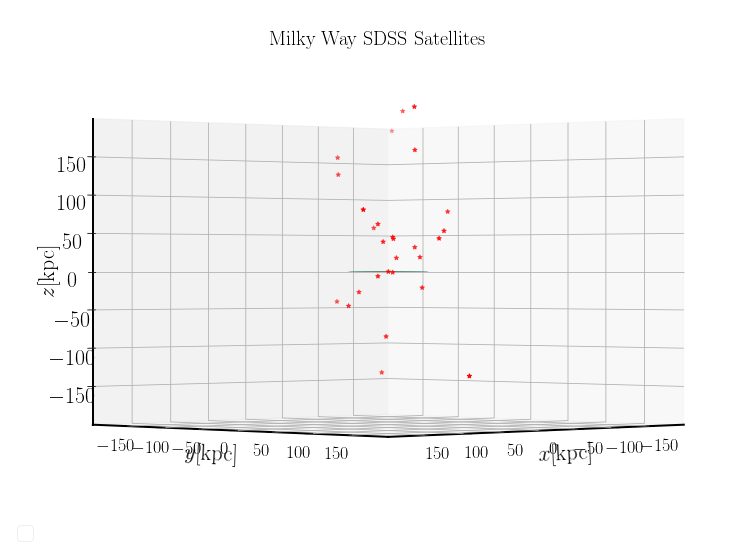

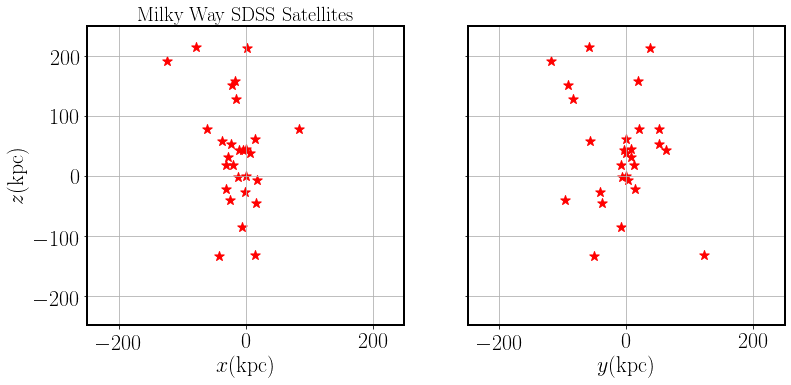

In [2]:
sat_MW = np.loadtxt("/home/jordi/satellite/MW_sat.txt").T
nom = ("Sagittarius", 'LMC','SMC','Draco','Ursa Minor','Sculptor','Sextans','Carina','Leo II','Leo I',
      "Canis Major", "Segue", "Ursa Major", "Bootes II", "Segue II", "Willman 1", "Coma Berenices","Bootes III", 
       "Bootes I", "Ursa Major I", "Hercules", "Hercules", "Leo IV", "Canes Venatici II", "Leo V", "Pisces II", 
       "Canes Venatici I")
x_MW, y_MW, z_MW = sat_MW
pts.plot3d(x_MW, y_MW, z_MW, t, r'$x$[kpc]', r'$y$[kpc]', r'$z$[kpc]', 0, 45,
       'Milky Way SDSS Satellites','/home/jordi/satellite/mw_SDSS_satellites_1',galaxy= True,R=192)
pts.plotmultiple2(x_MW, y_MW, z_MW,'Milky Way SDSS Satellites',
              '/home/jordi/satellite/mw_SDSS_satellites_2', R=250, units =True)


[  0.          18.27566688  49.10193479  61.03277808  76.43951858
  77.73030297  85.68547135  89.34203938 106.96261029 235.95126615
 257.6839149   13.45362405  28.37252192  38.28837944  39.47150871
  40.75536774  43.26661531  44.56455991  45.5521679   63.56099433
 101.79390944 126.08727136 149.40214189 154.66738506 161.03105291
 179.03072362 181.1021811  217.18425357]


/home/jordi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


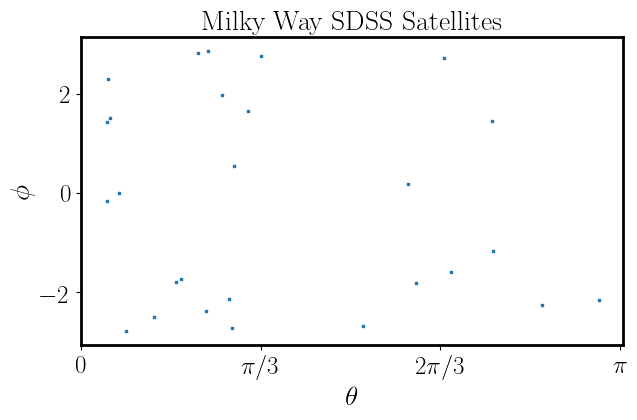

(28,)
(27,)
moda ModeResult(mode=array([0.15472171]), count=array([1]))
        $\theta$
count  27.000000
mean    1.133182
std     0.877536
min     0.154722
25%     0.490636
50%     0.864277
75%     1.929690
max     3.015018


<Figure size 600x500 with 0 Axes>

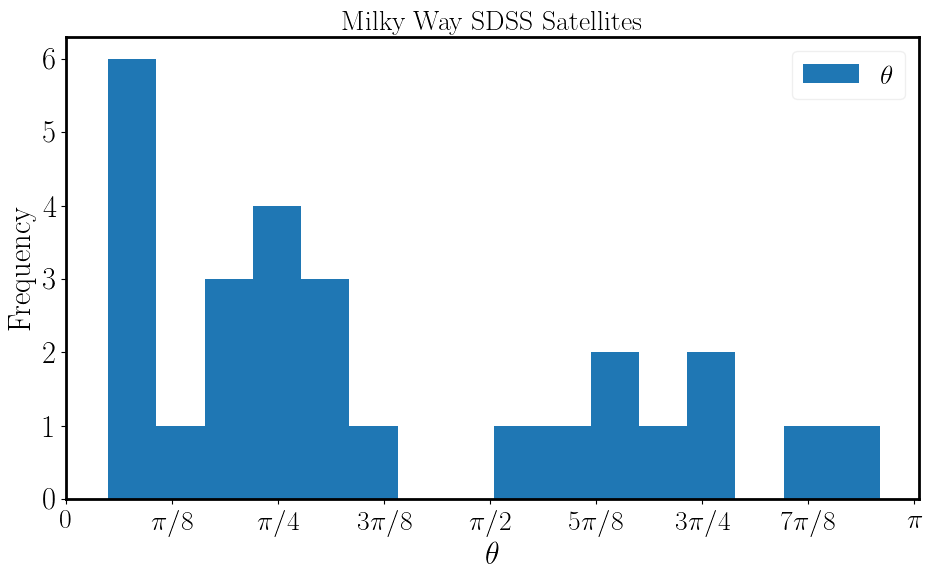

In [3]:
r_MW = np.sqrt(x_MW**2 + y_MW**2 + z_MW**2)
print(r_MW)
th_MW = np.arccos(z_MW/r_MW)
phi_MW = np.arctan2(y_MW,x_MW)
pts.scater(th_MW,phi_MW,r'$\theta$',r'$\phi$','Milky Way SDSS Satellites',ylim=(0,0),xlim=(0,0), xangular = True, 
           z3D=False, z=[],angular =False, color = False, c=[], clab = '',
           errorbar= False, yerr= [],
           name = '', dpi = 250, R = 200, save = True, s = 1., extra_data=False,
           x_extra = [], y_extra= [], extra_err=False, yerr_extra=None,
           xerr_extra= None, extratext = False, texts = [])
pts.histo(th_MW, r'$\theta$', bins = 16, rang=(0,0),nom_archivo ='', fit = False,
          dist = 'norm',normalized = False,title='Milky Way SDSS Satellites',
          logx = False, dens = False, xangular = True)

In [4]:
#scatter3d_animation(x_MW,y_MW,z_MW,r'$x$[kpc]',r'$y$[kpc]',r'$z$[kpc]',
#                    'MW', '/home/jordi/satellite/MW_satellite_positions_4.mp4',
#                    galaxy= True, R=258, elevado = False)
#scatter3d_animation(x_M31,y_M31,z_M31,r'$x$[kpc]',r'$y$[kpc]',r'$z$[kpc]',
#                    'M31','/home/jordi/satellite/M31_satellite_positions_1.mp4',
#                    galaxy= False, R=274, elevado = False)

In [5]:
c_MW = SkyCoord(x=x_MW, y=y_MW, z=z_MW, unit='kpc', frame= 'galactocentric',representation_type='cartesian')
#print(c_MW)
c_MW.representation_type = 'spherical'
#c_MW

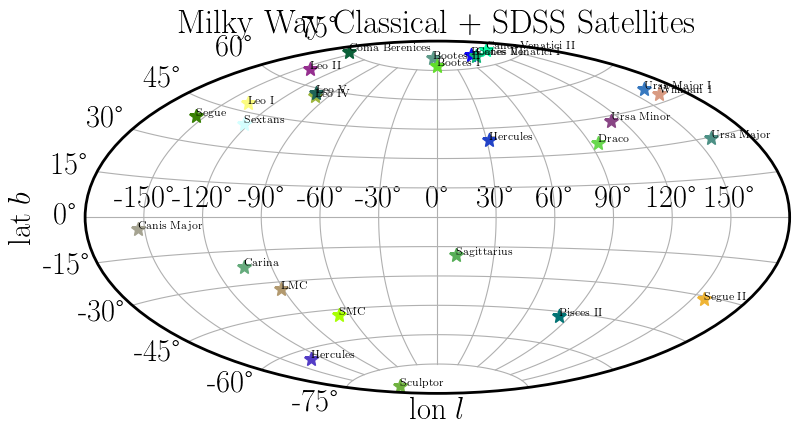

In [6]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1,2,1,projection='aitoff')
sc = list(mcolors.XKCD_COLORS)
ax.set_title("Milky Way Classical + SDSS Satellites")
for i in range(1,28):
    ax.plot(c_MW[i].lon.wrap_at(180*u.deg).radian, c_MW[i].lat.radian, marker='*', markersize= 10,color = sc[i])
    ax.text(c_MW[i].lon.wrap_at(180*u.deg).radian, c_MW[i].lat.radian, nom[i-1], fontsize=8)
ax.grid()
ax.set_xlabel('lon $l$')
ax.set_ylabel('lat $b$')
#plt.legend(nom, loc= 'lower right', fontsize= 10)
plt.savefig('/home/jordi/satellite/mw_SDSS_satellites_3', dpi=100, bbox_inches='tight')
plt.show()